In [13]:
import pandas as pd 
import numpy as np 

from matplotlib import pyplot as plt    
import seaborn as sns
import plotnine as gg #basically ggplot implemented in python 
from plotnine import ggplot 


In [15]:
participants = pd.read_csv('participants.csv')
trials = pd.read_csv('trials.csv')
# trials


merged = trials.merge(participants, on = 'id')
merged

# trials.groupby(by = 'condition'). describe() #aggregate data over variables -- this is nice if you want to have a look at your data 
summary = merged.groupby(by ='condition').aggregate(
    mean_RT = pd.NamedAgg('RT', np.mean),
    std_RT = pd.NamedAgg('RT', np.std), 
    age = pd.NamedAgg('age', np.mean)
)
summary.reset_index(inplace = True)

summary


,condition,mean_RT,std_RT,age
0,baseline,414.424923,244.134628,24.8
1,condition_a,616.648888,355.898787,24.8
2,condition_b,384.547910,241.174351,24.8


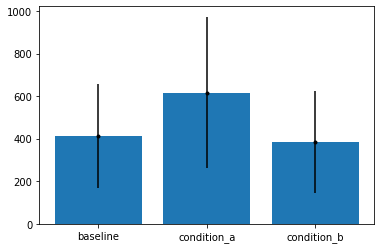

In [19]:
plt.figure()
plt.bar(summary['condition'], summary['mean_RT'])
plt.errorbar(summary['condition'], summary['mean_RT'], summary['std_RT'], fmt = 'k.')
plt.show()

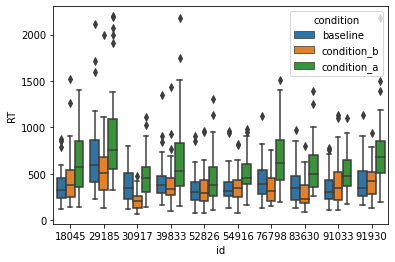

In [20]:
sns.boxplot(x = 'id', y='RT', hue = 'condition', data = trials)
plt.show()


#check seaborn.pydata.org for cool plots! 

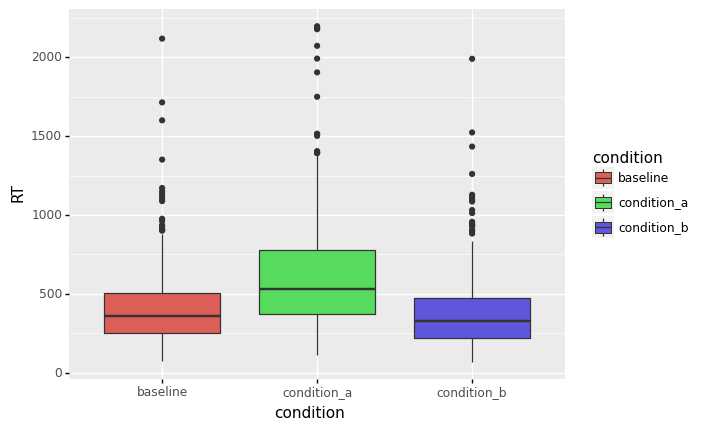

In [22]:
plot = (
    ggplot(gg.aes(x = 'condition', y = 'RT'), data = trials) + 
    gg.geom_boxplot(gg.aes(fill = 'condition')) 
)
plot.draw()
plt.show()


#look at the actual ggplot documentation first and then at the plotnine documentation 